In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from notebooks.utils import get_files, fig_path, names
from notebooks.utils.experiments import (
	results_all_samplers, get_labeled_data, flat_features
)

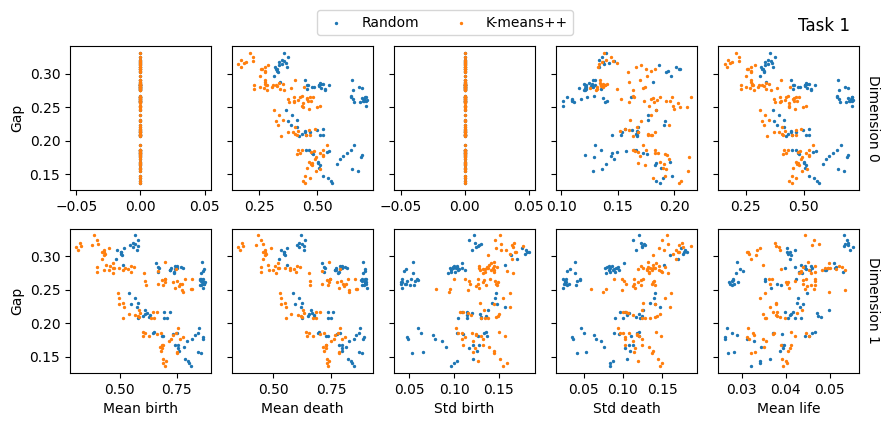

In [189]:
def scatter_sampler_part(task, samplers, feat_ix, f_names=[]):
	Xs = []
	ys = []
	for sampler in samplers:
		X, y = get_labeled_data(task, next(get_files(task, sampler)))
		Xs += [X[:,:,feat_ix]]
		ys += [y]
	fig, axs = plt.subplots(2, len(feat_ix), figsize=(9, 4), sharey=True)
	for dim in 0, 1:
		for i, ix in enumerate(feat_ix):
			ax = axs[dim, i]
			for X, y in zip(Xs, ys):
				x = X[:,dim,i]
				# r = np.corrcoef(x, y)[0,1]
				ax.scatter(x, y, s=2)
			label = f_names[i] if f_names else flat_features[ix + 12*dim]
			if dim==1:
				ax.set_xlabel(label)
			if i == 0:
				ax.set_ylabel('Gap')
			if i == len(feat_ix)-1:
				ax.set_ylabel(f'Dimension {dim}', rotation=-90, labelpad=15)
				ax.yaxis.set_label_position("right")
	fig.tight_layout()
	fig.subplots_adjust(wspace=0.15)
	fig.legend([names.samplers[s] for s in samplers], loc='upper center',
			   ncol=len(samplers), bbox_to_anchor=(0.5, 1.07))
	return fig, axs

fig, _ = scatter_sampler_part(1, ['Random', 'StratifiedKMeans20000'], [0,1,6,7,8],
	f_names=['Mean birth', 'Mean death', 'Std birth', 'Std death', 'Mean life'])
fig.suptitle('Task 1', ha='right', x=0.95, y=1.035)
fig.savefig(fig_path / 'task1_corr.pdf', bbox_inches='tight')

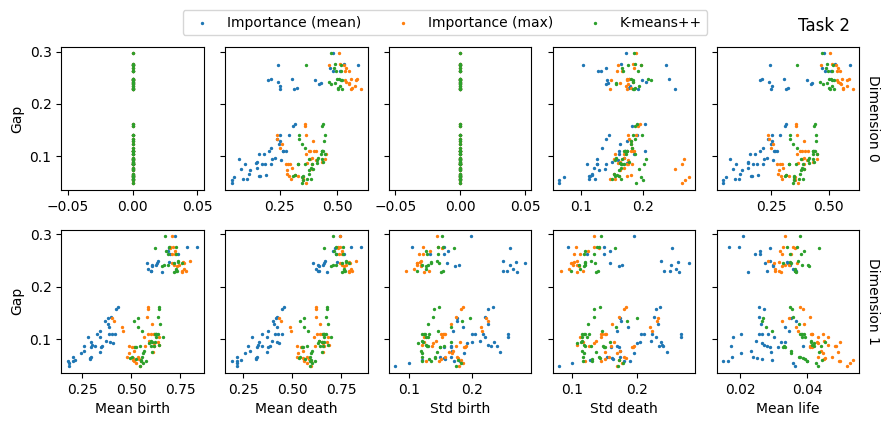

In [190]:
fig, _ = scatter_sampler_part(2, ['AvgImportance', 'MaxImportance', 'StratifiedKMeans20000'], [0,1,6,7,8],
	f_names=['Mean birth', 'Mean death', 'Std birth', 'Std death', 'Mean life'])
fig.suptitle('Task 2', ha='right', x=0.95, y=1.035)
fig.savefig(fig_path / 'task2_corr.pdf', bbox_inches='tight')

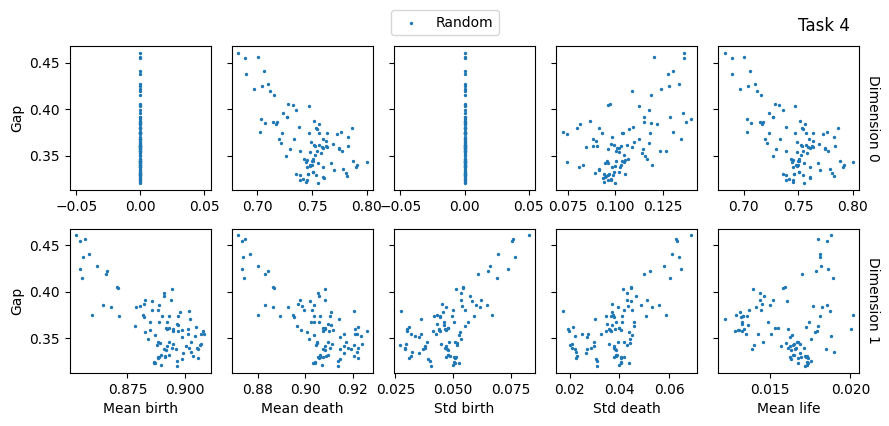

In [197]:
fig, _ = scatter_sampler_part(4, ['Random'], [0,1,6,7,8],
	f_names=['Mean birth', 'Mean death', 'Std birth', 'Std death', 'Mean life'])
fig.suptitle('Task 4', ha='right', x=0.95, y=1.035)
fig.savefig(fig_path / 'task4_corr.pdf', bbox_inches='tight')

Text(0.95, 1.035, 'Task 2')

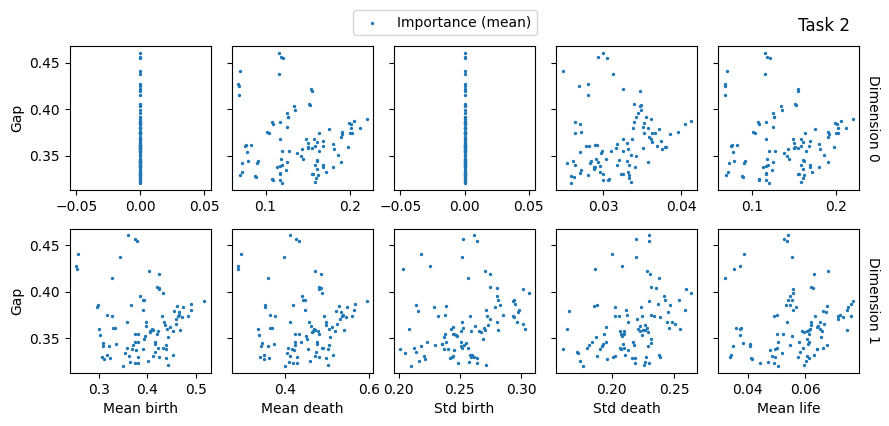

In [195]:
fig, _ = scatter_sampler_part(4, ['AvgImportance'], [0,1,6,7,8],
	f_names=['Mean birth', 'Mean death', 'Std birth', 'Std death', 'Mean life'])
fig.suptitle('Task 2', ha='right', x=0.95, y=1.035)

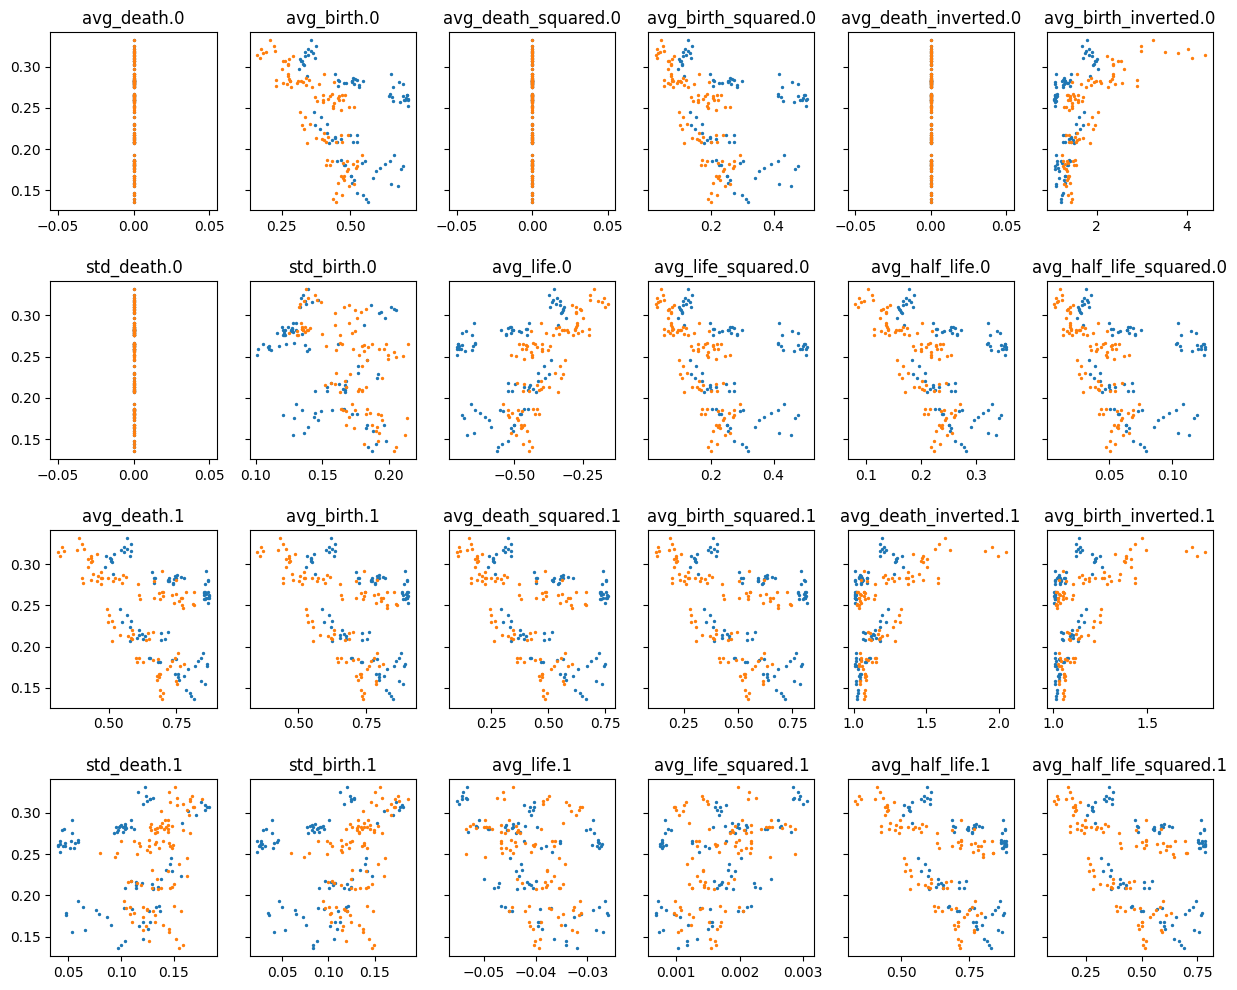

In [175]:
def scatter_sampler(task, samplers, fig=None, axs=None):
	Xs = []
	ys = []
	for sampler in samplers:
		X, y = get_labeled_data(task, next(get_files(task, sampler)))
		Xs += [X.reshape((len(X), -1))]
		ys += [y]
	if fig is None or axs is None:
		fig, axs = plt.subplots(4, 6, figsize=(15, 12), sharey=True)
	for i in range(Xs[0].shape[1]):
		ax = [ax for row in axs for ax in row][i]
		for X, y in zip(Xs, ys):
			ax.scatter(X[:,i], y, s=2)
		ax.set_title(flat_features[i])
	fig.subplots_adjust(hspace=0.4)
	return fig, axs

fig, axs = scatter_sampler(1, ['Random', 'StratifiedKMeans20000'])
# fig.legend()
plt.show()

In [65]:
task, samplers = 1, ['Random', 'StratifiedKMeans20000']
dfs = []
for sampler in samplers:
	X, y = get_labeled_data(task, next(get_files(task, sampler)))
	X = X.reshape((len(X), -1))
	dfs.append(pd.DataFrame(X, columns=pd.MultiIndex.from_tuples([(f).split('.') for f in flat_features]))
				.stack(level=1))
	dfs[-1]['gap'] = np.repeat(y, 2)
df = pd.concat(dfs, keys=samplers)
df = df.reset_index()\
	.rename(columns={'level_0': 'sampler', 'level_1': 'id', 'level_2': 'dim'})\
	.melt(value_vars=df.columns.delete(-1), id_vars=['sampler', 'dim', 'gap', 'id'])

In [67]:
df

,sampler,dim,gap,id,variable,value
0,Random,0,0.18570,0,avg_birth,0.643393
1,Random,1,0.18570,0,avg_birth,0.869446
2,Random,0,0.21736,1,avg_birth,0.523208
3,Random,1,0.21736,1,avg_birth,0.759404
4,Random,0,0.31026,2,avg_birth,0.370071
...,...,...,...,...,...,...
4459,StratifiedKMeans20000,1,0.17698,93,std_death,0.108706
4460,StratifiedKMeans20000,0,0.25096,94,std_death,0.000000
4461,StratifiedKMeans20000,1,0.25096,94,std_death,0.095691
4462,StratifiedKMeans20000,0,0.13600,95,std_death,0.000000


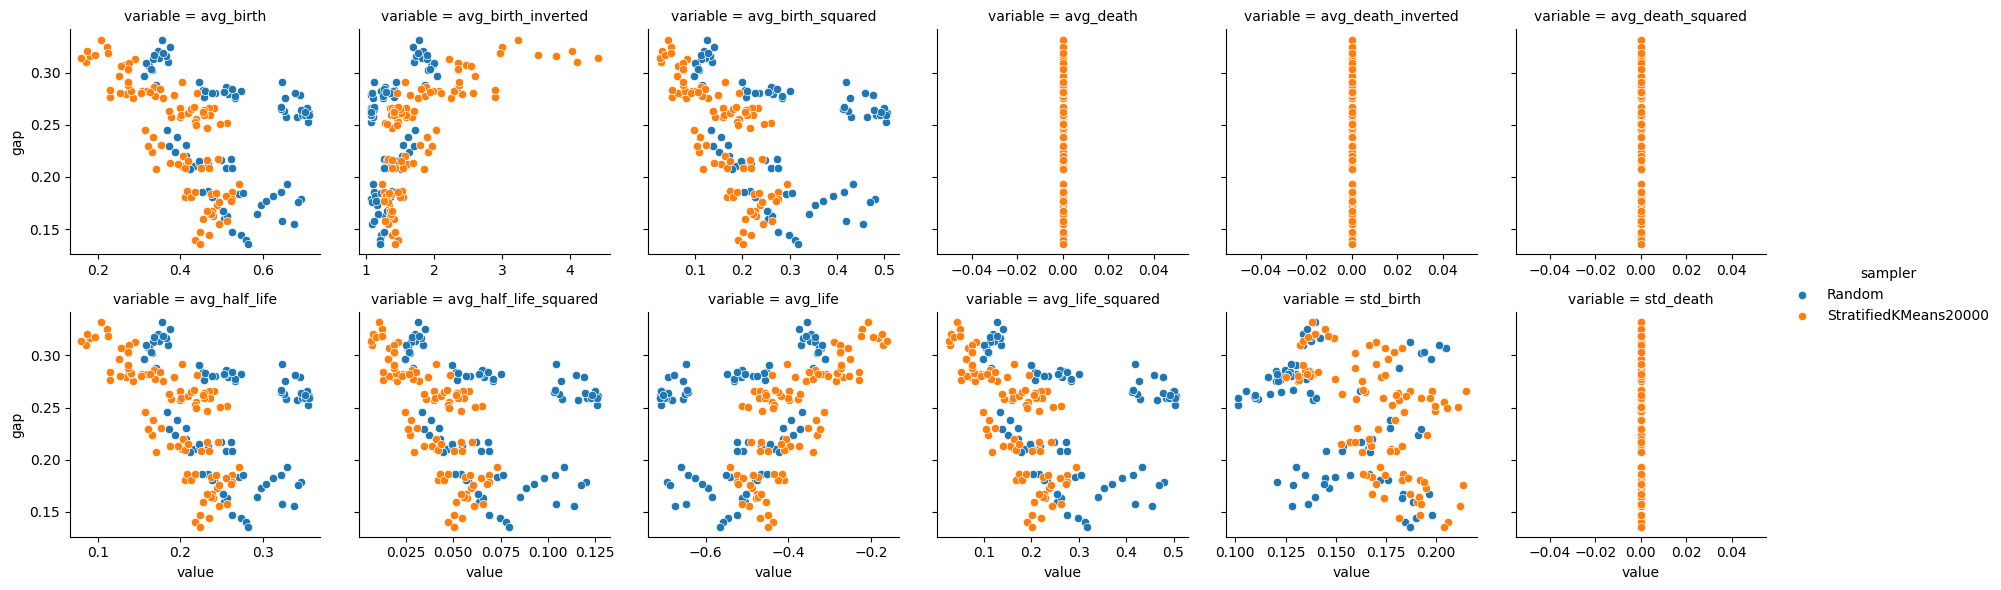

In [79]:
g = sns.FacetGrid(df[df['dim']=='0'], col='variable', hue='sampler', sharex=False, col_wrap=6)
g.map(sns.scatterplot, 'value', 'gap')
g.add_legend()

In [80]:
fig, axs = scatter_sampler(1, 'Random')
# scatter_sampler(1, 'Random', fig, axs)
# scatter_sampler(1, 'StratifiedRandom', fig, axs)
# scatter_sampler(1, 'ZeroImportance', fig, axs)
scatter_sampler(1, 'StratifiedKMeans20000', fig, axs)
plt.show()

NameError: name 'scatter_sampler' is not defined

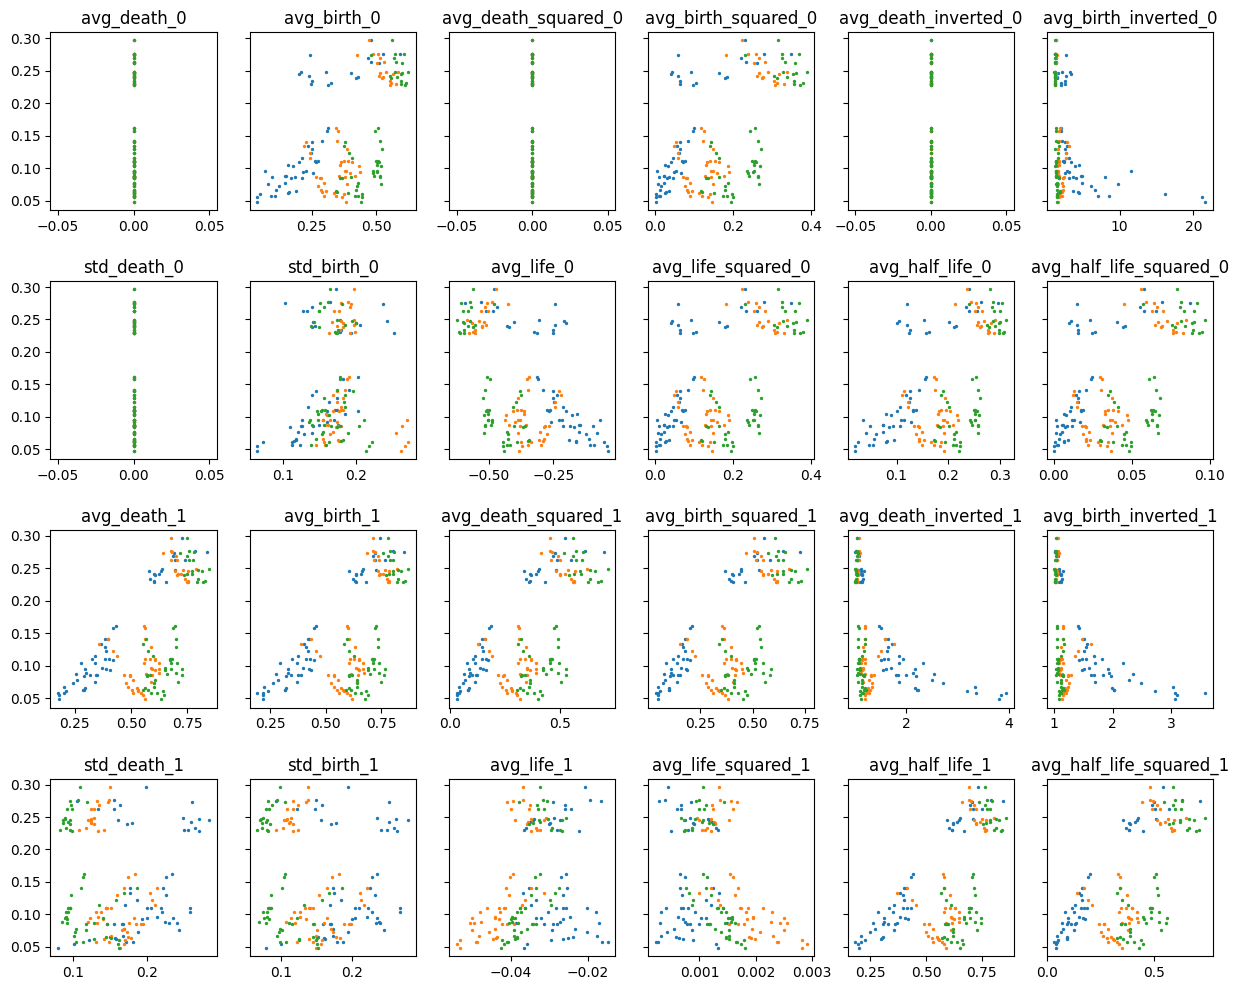

In [46]:
fig, axs = scatter_sampler(2, 'AvgImportance')
scatter_sampler(2, 'Random', fig, axs)
scatter_sampler(2, 'StratifiedRandom', fig, axs)
plt.show()